In [1]:

import ast
import pandas as pd
from datasets import load_dataset
from adjustText import adjust_text
import matplotlib.pyplot as plt
import seaborn as sns


#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\JA\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\JA\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Tue Dec 24 13:46:28 2024).


In [2]:
#only get data analyst jobs in the US

df_DA_US = df[(df['job_title_short'] == 'Data Analyst')  & (df['job_country'] == 'United States')].copy()

In [3]:
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

In [4]:
df_DA_US_explode = df_DA_US.explode('job_skills')

In [6]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [17]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_US_pivot = df_DA_US_pivot.drop('Total')

DA_Totals = df_DA_US.groupby('job_posted_month_no').size()

df_DA_US_percent = df_DA_US_pivot.div(DA_Totals/100, axis=0)

In [ ]:
# changes month number to month name

df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent

In [ ]:
# THE FIRST FIVE COLUMNS

df_DA_US_percent.iloc[:, :5]

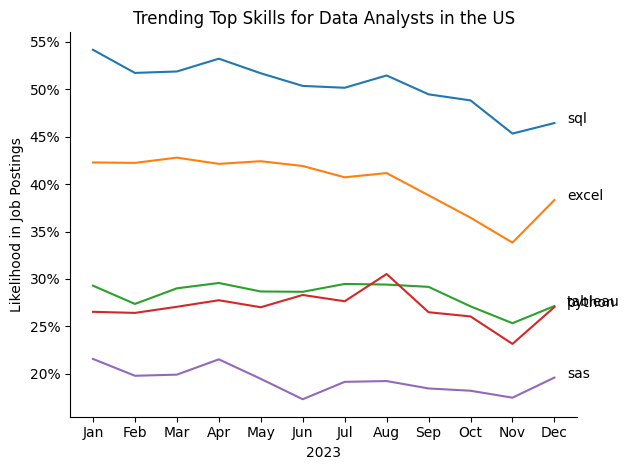

In [ ]:
#plotting with seaborn

df_plot = df_DA_US_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.despine()
plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Postings')
plt.xlabel('2023')
plt.legend().remove()


from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.3, df_plot.iloc[-1, i], df_plot.columns[i])



plt.tight_layout()